In [46]:
library(tidyverse)
library(lubridate)
library(jotaR)

In [50]:
# dados das observações
polls = read_csv("../exports/popularidade_observada.csv")

# dados da popularidade latente
positiva = read_csv("../exports/popularidade_positiva.csv")
negativa = read_csv("../exports/popularidade_negativa.csv")
regular = read_csv("../exports/popularidade_regular.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  data_fim = col_date(format = ""),
  empresa = col_character(),
  nome = col_character(),
  modo = col_character(),
  positiva = col_double(),
  regular = col_double(),
  negativa = col_double(),
  amostra = col_double(),
  erro = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  date = col_date(format = ""),
  mean = col_double(),
  hdi_50_lower = col_double(),
  hdi_50_upper = col_double(),
  hdi_90_lower = col_double(),
  hdi_90_upper = col_double(),
  label = col_character()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  date = col_date(format = ""),
  mean = col_double(),
  hdi_50_lower = col_double(),
  hdi_50_upper = col_double(),
  hdi_90_lower = col_double(),
  hdi_90_upper = col_double(),
  label = col_character()
)



── Column specification ────────────────────────────────────────────

In [51]:

preds <- rbind(positiva,
               negativa,
               regular) 

preds %>% filter(date == today())

date,mean,hdi_50_lower,hdi_50_upper,hdi_90_lower,hdi_90_upper,label
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


In [11]:
# future
preds %>% filter(date == today() + 15)

date,mean,hdi_50_lower,hdi_50_upper,hdi_90_left,hdi_90_upper,label
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


## Gráfico canônico 

In [56]:
locale('pt')
Sys.setlocale("LC_ALL", "pt_BR.UTF-8")


p10 <- ggplot(data = preds, aes(x = date)) +
  geom_ribbon(aes(ymin = hdi_90_lower*100,
                  ymax = hdi_90_upper*100,
                  fill = label),
              alpha = 0.25)

<locale>
Numbers:  123,456.78
Formats:  %AD / %AT
Timezone: UTC
Encoding: UTF-8
<date_names>
Days:   domingo (dom), segunda-feira (seg), terça-feira (ter), quarta-feira
        (qua), quinta-feira (qui), sexta-feira (sex), sábado (sáb)
Months: janeiro (jan), fevereiro (fev), março (mar), abril (abr), maio (mai),
        junho (jun), julho (jul), agosto (ago), setembro (set), outubro
        (out), novembro (nov), dezembro (dez)
AM/PM:  AM/PM

[1] "pt_BR.UTF-8/pt_BR.UTF-8/pt_BR.UTF-8/C/pt_BR.UTF-8/C"

In [57]:
## Decorating 
p10 <-
  p10 + geom_line(
    data = subset(preds, date <= lubridate::today()),
    aes(y = mean*100, colour = label),
    size = 1
  ) + scale_y_continuous(limits = c(0, 60)) +
  scale_x_date(
    date_labels = "%b'%y",
    date_breaks = "3 month",
    limits = c(
      as.Date("2019-01-01", format = "%Y-%m-%d"),
      as.Date(today()+45, format = "%Y-%m-%d")
    )
  ) 

p10 <- p10 +
  scale_colour_manual(
    breaks = c("POSITIVA", "REGULAR",  "NEGATIVA", "NS/NR"),
    values = c(
      "POSITIVA" = "#2AB2E3",
      "REGULAR" = "#7F7F7F",
      "NEGATIVA" = "#F05741",
      "NS/NR" = "#CCCCCC"
    )
  )

p10 <- p10 +
  scale_fill_manual(
    values = c(
      "POSITIVA" = "#2AB2E3",
      "REGULAR" = "#7F7F7F",
      "NEGATIVA" = "#F05741",
      "NS/NR" = "#CCCCCC"
    ),
    guide = FALSE
  )

p10 <- p10 +
  geom_point(
    data = polls,
    aes(x = data_fim, y = positiva*100, size =  amostra),
    shape = 16,
    alpha = .5,
    color = "#2AB2E3",
    show.legend = FALSE
  )

p10 <- p10 +
  geom_point(
    data = polls,
    aes(x = data_fim, y = negativa*100, size = amostra),
    shape = 16,
    alpha = .5,
    color = "#F05741",
    show.legend = FALSE
  )

p10 <- p10 +
  geom_point(
    data = polls,
    aes(x = data_fim, y = regular*100, size =  amostra),
    shape = 16,
    alpha = .5,
    color = "#7F7F7F",
    show.legend = FALSE
  )


# p10 <- p10 +
#  geom_point(
#    data = polls,
#    aes(x = data_fim, y = nsnr,  size = amostra),
#    shape = 16,
#    alpha = .5,
#    color = "#CCCCCC",
#    show.legend = FALSE)


## Rótulos de valores das séries 
- Precisam ser alterados manualmente

In [58]:
p10 <- p10 +
  scale_size_continuous(range = c(2, 3.5), guide = 'none') +
  labs(y = "% MENÇÕES", x = "",
       title = "Avaliação popular do governo de Jair Bolsonaro") +
  geom_hline(yintercept = 0,
             size = 0.85,
             colour = "#333333") +
  theme_jota(grid = "Yy",
             plot_margin = margin(13, 5, 3, 5), axis_text_size = 12) +
  theme(legend.position = "top", legend.title = element_blank()) +
  geom_label(aes(
    x = (lubridate::today()+35),
    y = 26,
    label = "25,4%"
  ),
  color = "#2AB2E3",
  size = 4) +
  geom_label(aes(
    x = (lubridate::today()+35),
    y = 20,
    label = "19,8%"
  ),
  color = "#7F7F7F",
  size = 4) +
  geom_label(aes(
    x = (lubridate::today()+35),
    y = 51,
    label = "52,4%"
  ),
  color = "#F05741",
  size = 4) +
  geom_label(aes(
    x = (lubridate::today()+35),
    y = 2,
    label = "2,3%"
  ),
  color = "#CCCCCC",
  size = 4) 


## Legendas explicativas

Warning message:
“Removed 96 row(s) containing missing values (geom_path).”
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label),

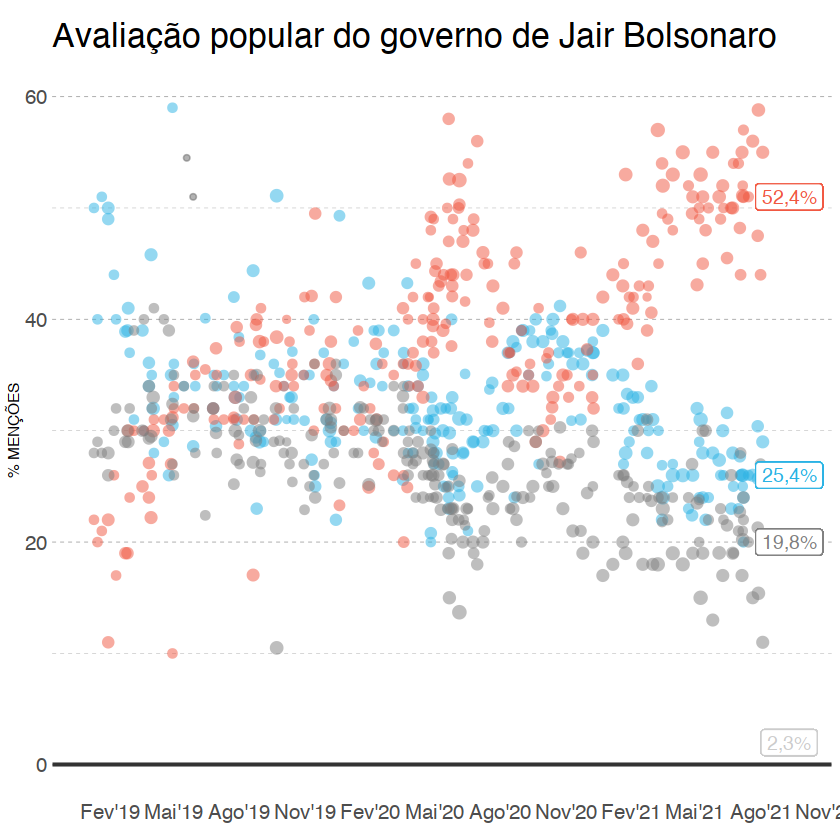

In [59]:
# Add legend 
legend.data <- preds %>%
  dplyr::filter(label == "positivo" & date > as.Date("2019-05-13") &
                  date < as.Date("2019-06-25")) %>%
  # move the data further back on the x-axis
  # mutate(dayofleapyear = dayofleapyear - 15) %>%
  # move the data up on the y-axis
  mutate(mean = mean + 19,
         hdi_90_lower = hdi_90_lower + 19,
         hdi_90_upper = hdi_90_upper + 19)


p10 <- p10 +
  geom_ribbon(data = legend.data,
              aes(x = date,
                  ymin = hdi_90_lower,
                  ymax = hdi_90_upper),
              alpha = 0.25)

p10 <- p10 +
  geom_line(
    data = legend.data,
    aes(x = date,
        y = mean),
    color = "gray40",
    size = 1
  ) 


p10 <- p10 +
  geom_point(
    data = legend.data,
    aes(x = as.Date("2019-05-20"),
        y = 54.5),
    color = "gray40",
    alpha = 0.5,
    size = 1.2
  ) 


p10 <- p10 +
  geom_point(
    data = legend.data,
    aes(x = as.Date("2019-05-29"),
        y = 51),
    color = "gray40",
    alpha = 0.5,
    size = 1.2
  ) 


### Anotações para entender as linhas das séries

Warning message:
“Removed 96 row(s) containing missing values (geom_path).”
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label),

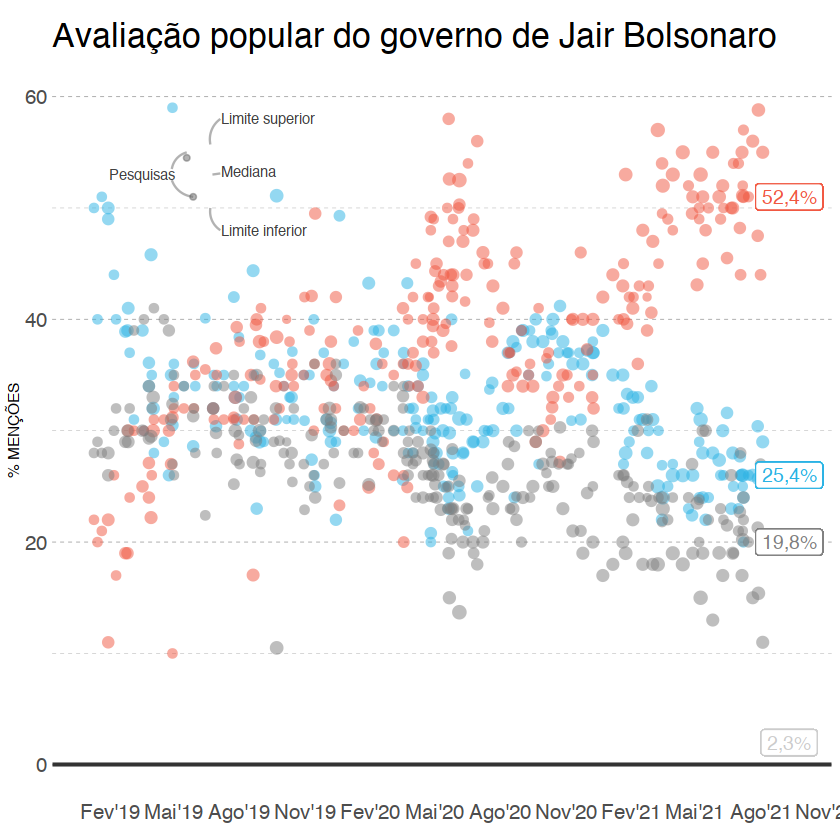

In [60]:
p10 <- p10 +
  annotate(geom = "curve", curvature = -.3, x = as.Date("2019-06-22"), xend = as.Date("2019-07-06"),
           y = 55.7, yend = 58, color = "gray40", alpha = 0.5) +
  annotate("text", x = as.Date("2019-07-07"), y = 58,
           label = "Limite superior", color = "gray25", hjust = 0, size=3)

p10 <- p10 +
  annotate(geom = "curve", curvature = .3, x = as.Date("2019-06-22"), xend = as.Date("2019-07-06"),
           y = 50,
           yend = 48, color = "gray40", alpha = 0.5) +
  annotate("text", x = as.Date("2019-07-07"), y = 48,
           label = "Limite inferior", color = "gray25", hjust = 0, size=3)


# Mediana 
p10 <- p10 +
  annotate("segment", x = as.Date("2019-06-25"), xend = as.Date("2019-07-06"),
           y = 53,
           yend = 53.1, color = "gray40", alpha = 0.5) +
  annotate("text", x = as.Date("2019-07-07"), y = 53.3,
           label = "Mediana", color = "gray25", hjust = 0, size=3)


# pontos 
p10 <- p10 +
    annotate(geom = "curve", curvature = .3, x = as.Date("2019-05-20"), xend = as.Date("2019-04-29"),
             y = 55, yend = 53.5, color = "gray40", alpha = 0.5) +
  annotate(geom = "curve", curvature = -.3, x = as.Date("2019-05-29"), xend = as.Date("2019-04-29"),
           y = 51, yend = 52.5, color = "gray40", alpha = 0.5) +
    annotate("text", x = as.Date("2019-04-20"), y = 53,
             label = "Pesquisas", color = "gray25", hjust = .85, size=3)

p10



### Coloca indicações para o coronavoucher

Warning message:
“Removed 96 row(s) containing missing values (geom_path).”
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Roboto Regular' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label),

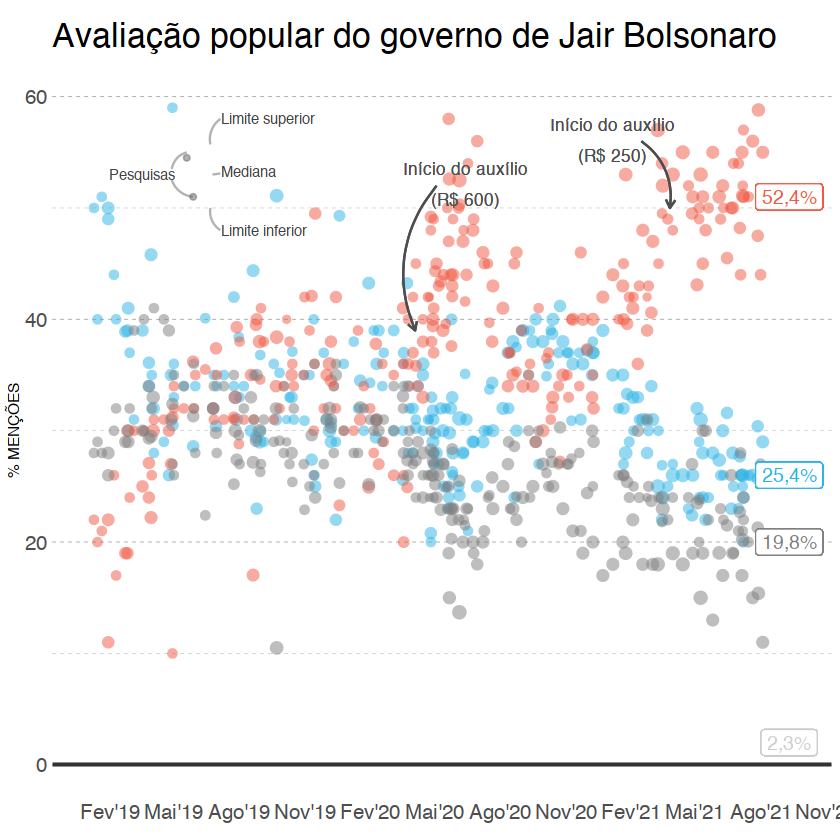

In [62]:
CORONAVOUCHER1 = as.Date("2020-04-14")
lbls = 'atop(bold("Início do auxílio"),bold("(R$ 600)"))'

CORONAVOUCHER2 = as.Date("2021-04-06")
lbls2 = 'atop(bold("Início do auxílio"),bold("(R$ 250)"))'


p10 <- p10 +
  annotate(
    geom = "curve", x = CORONAVOUCHER1+20, y = 52, xend = CORONAVOUCHER1-10, yend = 39, 
    curvature = .3, colour = "gray30", arrow = arrow(length = unit(2, "mm"))
  ) +
  annotate(geom = "text", x = CORONAVOUCHER1+60, y = 52, label = lbls, size = 3.5, colour = "gray30", hjust = "center", parse = TRUE)

p10 <- p10 +
  annotate(
    geom = "curve", x = CORONAVOUCHER2-50, y = 56, xend = CORONAVOUCHER2-10, yend = 50, 
    curvature = -.3, colour = "gray30", arrow = arrow(length = unit(2, "mm"))
  ) +
  annotate(geom = "text", x = CORONAVOUCHER2-90, y = 56, label = lbls2,  size = 3.5, colour = "gray30", hjust = "center", parse = TRUE)

p10

## Salva e finaliza a imagem

In [ ]:
ggsave(
  plot = p10,
  filename = glue::glue("~/Aprovacao/img/aval_gov.svg"),
  width = 25,
  height = 15,
  units = "cm"
)


ggsave(
  plot = p10,
  filename = glue::glue("~/Aprovacao/img/aval_gov.png"),
  width = 25,
  height = 15,
  units = "cm"
)


library(jotaR)


p10a = finalize_ggplot(p10)


png(
  "~/Aprovacao/img/aval_gov_logo.png",
  width = 8.5,
  height = 5,
  units = "in",
  res = 300
)

print(p10a)

# '#e5001c'
grid.rect(
  x = 0.15,
  y = .99,
  hjust = 1,
  vjust = 0,
  gp = gpar(fill = '#F05741', lwd = 0)
)

dev.off()
